In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Preprocessing

In [ ]:
# # from google.colab import drive
# # drive.mount('/content/drive')

# # Cài đặt gói Kaggle
# # !pip install kaggle

# Tải API Key từ tài khoản Kaggle của bạn và đặt nó trong thư mục /content
from google.colab import files
files.upload()

# Tạo thư mục ~/.kaggle và sao chép API Key vào đó
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Phân quyền cho API Key
!chmod 600 ~/.kaggle/kaggle.json

# Tải tập dữ liệu từ Kaggle
!kaggle datasets download -d codebreaker619/hepatitis-data

# Giải nén tập dữ liệu
!unzip hepatitis-data.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/codebreaker619/hepatitis-data
License(s): other
  0% 0.00/2.55k [00:00<?, ?B/s]
100% 2.55k/2.55k [00:00<00:00, 1.56MB/s]
Archive:  hepatitis-data.zip
  inflating: hepatitis_csv.csv       


In [ ]:
data = pd.read_csv('/content/hepatitis_csv.csv')
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [ ]:
data.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [ ]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [ ]:
data.isna().any()

age                False
sex                False
steroid             True
antivirals         False
fatigue             True
malaise             True
anorexia            True
liver_big           True
liver_firm          True
spleen_palpable     True
spiders             True
ascites             True
varices             True
bilirubin           True
alk_phosphate       True
sgot                True
albumin             True
protime             True
histology          False
class              False
dtype: bool

In [ ]:
data.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [ ]:
{columns : len(data[columns].unique()) for columns in data.select_dtypes('float')}

{'bilirubin': 35,
 'alk_phosphate': 84,
 'sgot': 85,
 'albumin': 30,
 'protime': 45}

In [ ]:
{columns : len(data[columns].unique()) for columns in data.select_dtypes('int')}

{'age': 49}

In [ ]:
{columns : len(data[columns].unique()) for columns in data.select_dtypes('object')}

{'sex': 2,
 'steroid': 3,
 'fatigue': 3,
 'malaise': 3,
 'anorexia': 3,
 'liver_big': 3,
 'liver_firm': 3,
 'spleen_palpable': 3,
 'spiders': 3,
 'ascites': 3,
 'varices': 3,
 'class': 2}

In [ ]:
{columns : len(data[columns].unique()) for columns in data.select_dtypes('bool')}

{'antivirals': 2, 'histology': 2}

In [ ]:
data = data.copy()

# Identify the continuous numeric features
continuous_features = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']

# Fill missing values
for column in continuous_features:
    data[column] = data[column].fillna(data[column].mean())

for column in data.columns.drop(continuous_features):
    data[column] = data[column].fillna(data[column].mode().sample(1, random_state=1).values[0])

# Convert the booleans columns into integer columns
    for column in data.select_dtypes('bool'):
        data[column] = data[column].astype(np.int64)

# Encode the sex column as a binary feature
data['sex'] = data['sex'].replace({
    'female': 0,
    'male': 1
})

# Encode the class column as a binary feature
data['class'] = data['class'].replace({
    'live': 0,
    'die': 1
})

In [ ]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,61.852273,0,0
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,61.852273,0,0
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,61.852273,0,0
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,0
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,61.852273,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,1,0,1,1,1,1,0,0,1,1,1,7.6,105.325397,242.0,3.3,50.000000,1,1
151,44,0,1,0,1,0,0,1,1,0,0,0,0,0.9,126.000000,142.0,4.3,61.852273,1,0
152,61,0,0,0,1,1,0,0,1,0,1,0,0,0.8,75.000000,20.0,4.1,61.852273,1,0
153,53,1,0,0,1,0,0,1,0,1,1,0,1,1.5,81.000000,19.0,4.1,48.000000,1,0


# Trực quan hóa dữ liệu

In [ ]:
data.to_excel('hepatitis_processed.xlsx', index=False)

In [ ]:
# Đọc file Excel
df = pd.read_excel('/content/hepatitis_processed.xlsx')

# Hiển thị thông tin về DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    int64  
 2   steroid          155 non-null    int64  
 3   antivirals       155 non-null    int64  
 4   fatigue          155 non-null    int64  
 5   malaise          155 non-null    int64  
 6   anorexia         155 non-null    int64  
 7   liver_big        155 non-null    int64  
 8   liver_firm       155 non-null    int64  
 9   spleen_palpable  155 non-null    int64  
 10  spiders          155 non-null    int64  
 11  ascites          155 non-null    int64  
 12  varices          155 non-null    int64  
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    float64
 15  sgot             155 non-null    float64
 16  albumin          155 non-null    float64
 17  protime         

In [ ]:
# Hiển thị một số dòng đầu tiên của DataFrame
print(df.head())

   age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0   30    1        0           0        0        0         0          0   
1   50    0        0           0        1        0         0          0   
2   78    0        1           0        1        0         0          1   
3   31    0        1           1        0        0         0          1   
4   34    0        1           0        0        0         0          1   

   liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
0           0                0        0        0        0        1.0   
1           0                0        0        0        0        0.9   
2           0                0        0        0        0        0.7   
3           0                0        0        0        0        0.7   
4           0                0        0        0        0        1.0   

   alk_phosphate   sgot  albumin    protime  histology  class  
0      85.000000   18.0      4.0  61.852273         

## Phân bố bệnh gan dựa trên biến mục tiêu

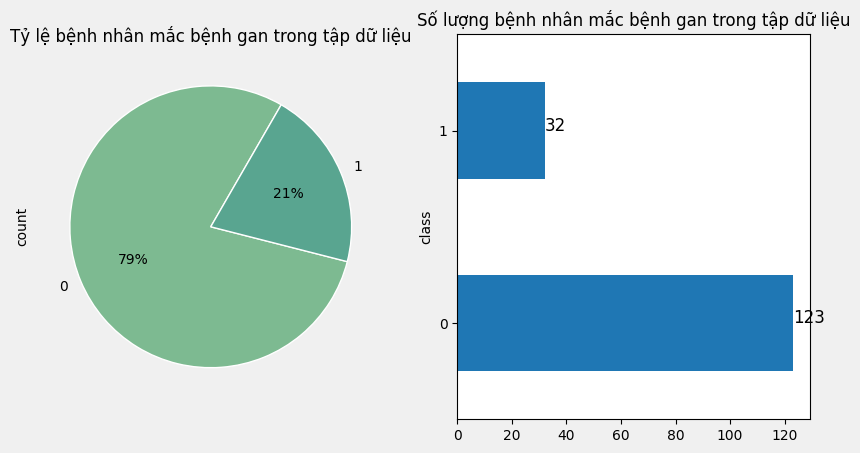

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5), facecolor=(.94, .94, .94))

# Trực quan tỷ lệ bệnh nhân mắc bệnh gan trong tập dữ liệu bằng biểu đồ pie
ax1 = df['class'].value_counts().plot.pie(autopct="%1.0f%%", labels=['0', '1'], startangle=60, ax=ax1, colors=sns.color_palette("crest"), wedgeprops=dict(edgecolor="white"))
ax1.set(title='Tỷ lệ bệnh nhân mắc bệnh gan trong tập dữ liệu')

# Trực quan số lượng bệnh nhân mắc bệnh gan trong tập dữ liệu bằng biểu đồ barh
ax2 = df["class"].value_counts().plot(kind="barh", ax=ax2)
for x, y in enumerate(df["class"].value_counts().values):
    ax2.text(y, x, str(y), fontsize=12)
ax2.set(title='Số lượng bệnh nhân mắc bệnh gan trong tập dữ liệu')

plt.show()


## Phân bố bệnh gan theo giới tính và tuổi tác

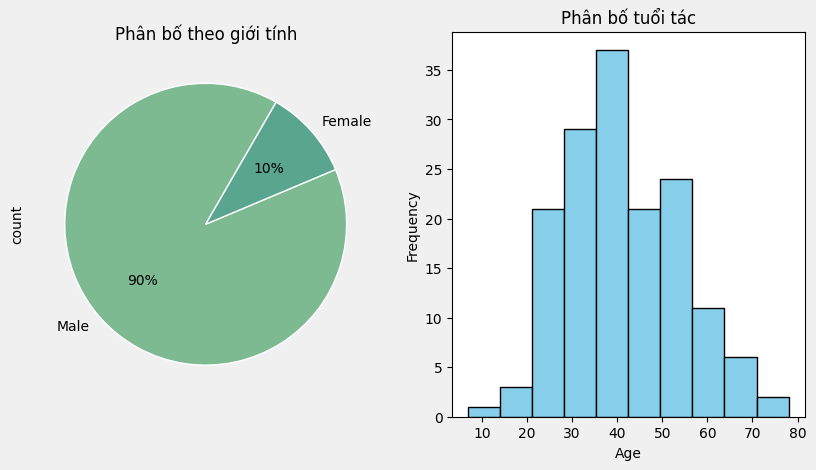

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5), facecolor=(.94, .94, .94))

# Trực quan phân bố theo giới tính bằng biểu đồ pie
ax1 = df['sex'].value_counts().plot.pie(autopct="%1.0f%%", labels=["Male", "Female"], startangle=60, ax=ax1, colors=sns.color_palette("crest"), wedgeprops=dict(edgecolor="white"))
ax1.set(title='Phân bố theo giới tính')

# Trực quan phân bố tuổi tác bằng biểu đồ histogram
ax2.hist(df['age'], bins=10, edgecolor='black', color='skyblue')
ax2.set(title='Phân bố tuổi tác', xlabel='Age', ylabel='Frequency')

plt.show()


## Phân bố các đặc trưng số

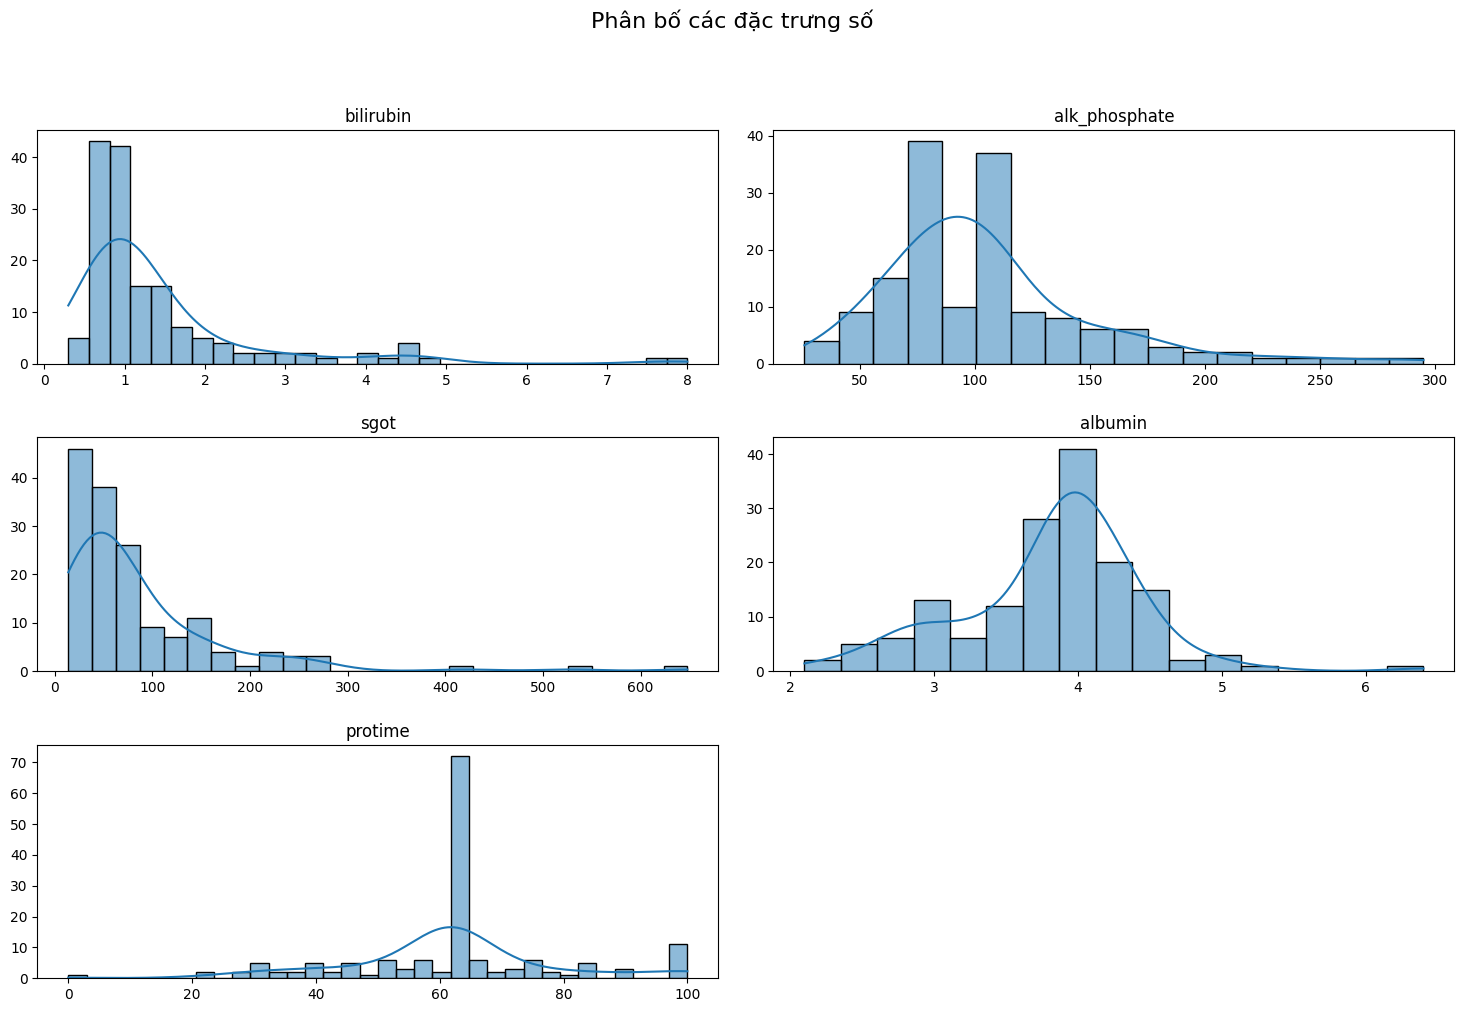

In [ ]:
# Chọn các cột quan tâm
columns_of_interest = ['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
numerical_features = df[columns_of_interest]

# Vẽ biểu đồ phân bố của các đặc trưng số
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features.columns, 1):
    ax = plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.xlabel("")  # Loại bỏ nhãn trục x để tránh trùng lặp
    plt.ylabel("")  # Loại bỏ nhãn trục y để tránh trùng lặp
plt.suptitle('Phân bố các đặc trưng số', y=1.02, fontsize=16)  # Thêm tiêu đề cho toàn bộ hình ảnh
plt.tight_layout(pad=2)  # Điều chỉnh khoảng cách giữa các subplot
plt.show()


## Tính toán số lượng và tần suất xuất hiện của các giá trị trong các cột phân loại của DataFrame

In [ ]:
print(df.columns)

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')


In [ ]:
categorical_variables = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites', 'varices', 'histology']

# Áp dụng value_counts cho mỗi cột trong danh sách categorical_variables
value_counts_df = df[categorical_variables].apply(pd.Series.value_counts)

# Hiển thị DataFrame kết quả
print(value_counts_df)


   sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0  139       76         131       54       94       123         25   
1   16       79          24      101       61        32        130   

   liver_firm  spleen_palpable  spiders  ascites  varices  histology  
0          95              125      104      135      137         85  
1          60               30       51       20       18         70  


Mỗi điểm dữ liệu sẽ được biểu diễn bằng một điểm trên biểu đồ scatter plot, trong đó các biến số được chọn sẽ xuất hiện trên các trục x và y. Các điểm dữ liệu sẽ được tô màu dựa trên giá trị của biến phân loại 'class'.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


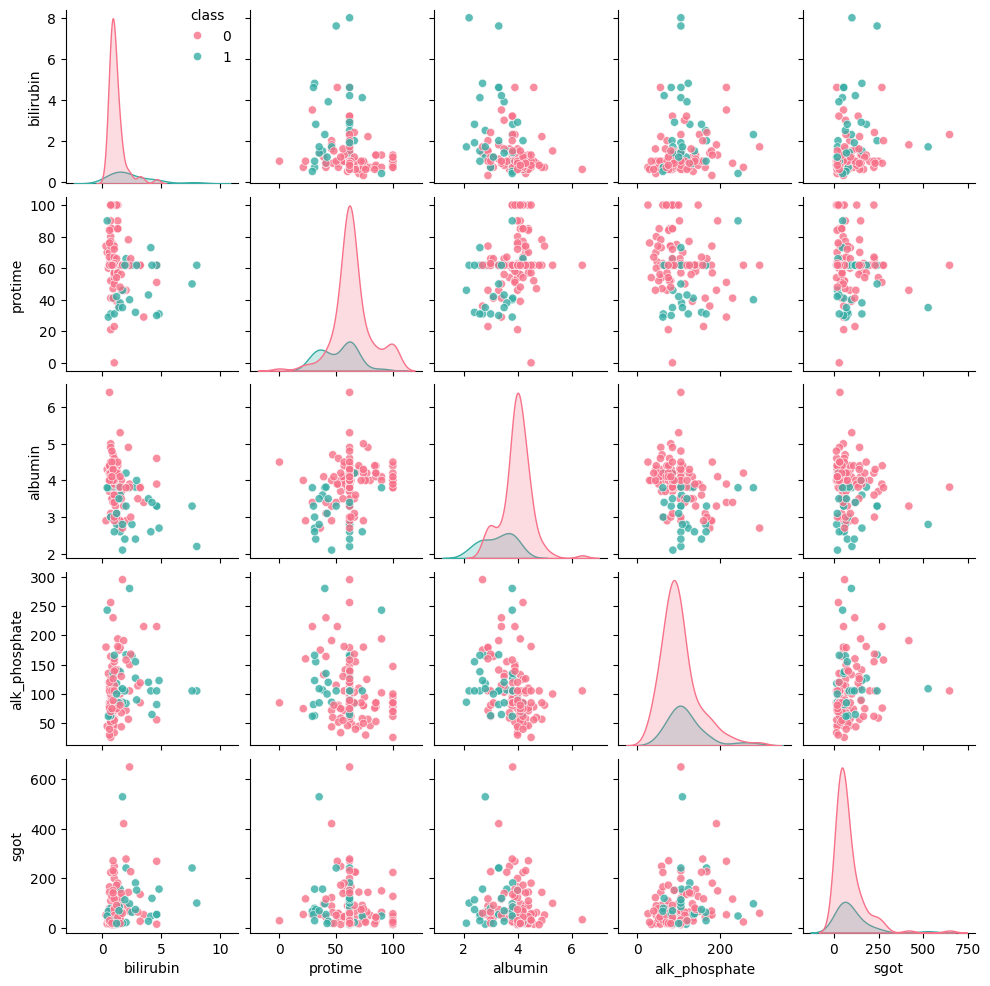

In [ ]:
g = sns.pairplot(df, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
               hue = 'class',
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

## Biểu đồ tương quan

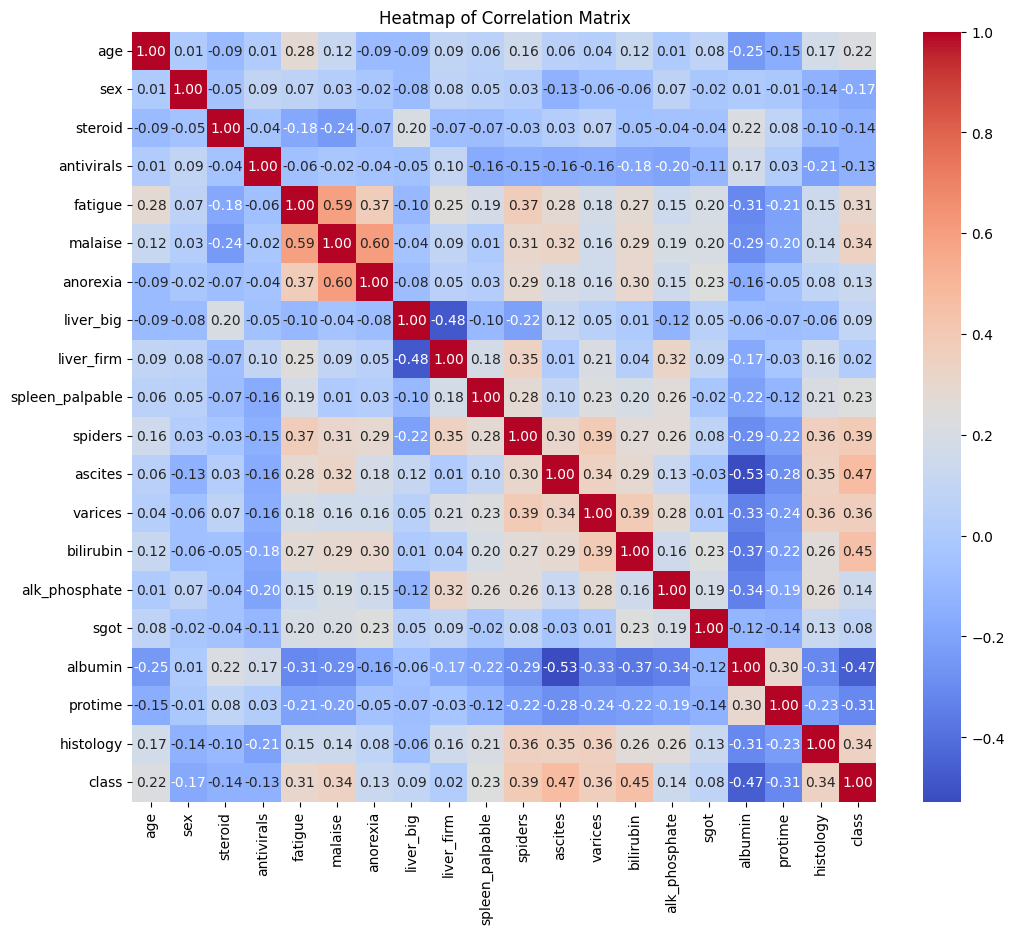

In [ ]:
# Tạo DataFrame subset chứa các cột được chọn
subset_df = df[df.columns]

# Tạo heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Oversampling

In [ ]:
# Đếm số lượng mẫu trong mỗi nhóm
count_by_class = data['class'].value_counts()

# Số lượng mẫu trong nhóm "live"
num_live = count_by_class[0] if 0 in count_by_class.index else 0

# Số lượng mẫu trong nhóm "die"
num_die = count_by_class[1] if 1 in count_by_class.index else 0

# Tính phần trăm số mẫu của mỗi nhóm
total_samples = num_live + num_die
percentage_live = (num_live / total_samples) * 100
percentage_die = (num_die / total_samples) * 100

print("Số bệnh nhân sống (live):", num_live)
print("Số bệnh nhân chết (die):", num_die)
print("Phần trăm số mẫu của nhóm 'live':", percentage_live)
print("Phần trăm số mẫu của nhóm 'die':", percentage_die)

Số bệnh nhân sống (live): 123
Số bệnh nhân chết (die): 32
Phần trăm số mẫu của nhóm 'live': 79.35483870967742
Phần trăm số mẫu của nhóm 'die': 20.64516129032258


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

xfeatures =data[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = data['class']

smk = SMOTETomek(random_state=42)
xfeatures_new, ylabels_new = smk.fit_resample(xfeatures, ylabels)
pd.Series(ylabels_new).value_counts()

df_new = xfeatures_new.join(ylabels_new)

In [ ]:
df_new

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.000000,85.000000,18.000000,4.000000,61.852273,0,0
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.900000,135.000000,42.000000,3.500000,61.852273,0,0
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.700000,96.000000,32.000000,4.000000,61.852273,0,0
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.700000,46.000000,52.000000,4.000000,80.000000,0,0
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.000000,105.325397,200.000000,4.000000,61.852273,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,45,0,1,0,0,0,0,1,0,0,1,0,0,1.680940,90.381191,21.404702,3.761293,56.428213,1,1
230,41,0,1,0,1,0,0,1,0,0,1,0,0,3.777793,72.402458,118.898591,3.216432,61.852273,1,1
231,40,0,0,0,1,1,0,1,0,0,0,0,0,0.540331,62.201655,70.419859,3.638676,29.403310,1,1
232,42,0,0,0,1,1,1,1,0,0,0,0,0,2.819377,105.325397,112.040672,2.369856,61.852273,1,1


# SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df1_svm = df_new.copy()

# Chia dữ liệu thành features và labels
X_svm = df1_svm.drop(columns=['class'])
y_svm = df1_svm['class']

# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size_svm = int(0.8 * len(df1_svm))
test_size_svm = int(0.1 * len(df1_svm))
val_size_svm = len(df1_svm) - train_size_svm - test_size_svm

X_train_svm = X_svm[:train_size_svm]
y_train_svm = y_svm[:train_size_svm]

X_test_svm = X_svm[train_size_svm:train_size_svm+test_size_svm]
y_test_svm = y_svm[train_size_svm:train_size_svm+test_size_svm]

X_val_svm = X_svm[train_size_svm+test_size_svm:]
y_val_svm = y_svm[train_size_svm+test_size_svm:]

# Tiêu chuẩn hóa dữ liệu
scaler_svm = StandardScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train_svm)
X_test_scaled_svm = scaler_svm.transform(X_test_svm)
X_val_scaled_svm = scaler_svm.transform(X_val_svm)

# Khai báo các giá trị siêu tham số bạn muốn thử
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']}

# Khởi tạo mô hình SVM
svm = SVC()

# Tìm giá trị siêu tham số tốt nhất bằng cross-validation trên tập huấn luyện
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled_svm, y_train_svm)

# In ra giá trị siêu tham số tốt nhất
print("Best parameters for SVM:", grid_search_svm.best_params_)

# Dự đoán trên tập test với siêu tham số tốt nhất
best_svm_model = grid_search_svm.best_estimator_
y_test_pred_best_svm = best_svm_model.predict(X_test_scaled_svm)

# Đánh giá mô hình trên tập test với siêu tham số tốt nhất
accuracy_test_best_svm = accuracy_score(y_test_svm, y_test_pred_best_svm) *100
precision_test_best_svm = precision_score(y_test_svm, y_test_pred_best_svm) *100
recall_test_best_svm = recall_score(y_test_svm, y_test_pred_best_svm) *100
f1_score_test_best_svm = f1_score(y_test_svm, y_test_pred_best_svm) *100

print("\nMetrics on test data with best SVM:")
print("Accuracy: {:.2f}%".format(accuracy_test_best_svm))
print("Precision: {:.2f}%".format(precision_test_best_svm))
print("Recall: {:.2f}%".format(recall_test_best_svm))
print("F1-score: {:.2f}%".format(f1_score_test_best_svm))


Best parameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Metrics on test data with best SVM:
Accuracy: 91.30%
Precision: 100.00%
Recall: 91.30%
F1-score: 95.45%


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

df2_knn = df_new.copy()

# Chia dữ liệu thành features và labels
X_knn = df2_knn.drop(columns=['class'])
y_knn = df2_knn['class']

# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size_knn = int(0.8 * len(df2_knn))
test_size_knn = int(0.1 * len(df2_knn))
val_size_knn = len(df2_knn) - train_size_knn - test_size_knn

X_train_knn = X_knn[:train_size_knn]
y_train_knn = y_knn[:train_size_knn]

X_test_knn = X_knn[train_size_knn:train_size_knn+test_size_knn]
y_test_knn = y_knn[train_size_knn:train_size_knn+test_size_knn]

X_val_knn = X_knn[train_size_knn+test_size_knn:]
y_val_knn = y_knn[train_size_knn+test_size_knn:]

# Tiêu chuẩn hóa dữ liệu
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
X_test_scaled_knn = scaler_knn.transform(X_test_knn)
X_val_scaled_knn = scaler_knn.transform(X_val_knn)

# Khai báo các giá trị siêu tham số bạn muốn thử
param_grid_knn = {'n_neighbors': list(range(3, 8))}

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# Tìm giá trị siêu tham số tốt nhất bằng cross-validation trên tập huấn luyện
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled_knn, y_train_knn)

# In ra giá trị siêu tham số tốt nhất
print("Best K for KNN:", grid_search_knn.best_params_['n_neighbors'])

# Dự đoán trên tập test với giá trị siêu tham số tốt nhất
best_knn_model = grid_search_knn.best_estimator_
y_test_pred_best_knn = best_knn_model.predict(X_test_scaled_knn)

# Đánh giá mô hình trên tập test với giá trị siêu tham số tốt nhất
accuracy_test_best_knn = accuracy_score(y_test_knn, y_test_pred_best_knn) *100
precision_test_best_knn = precision_score(y_test_knn, y_test_pred_best_knn) *100
recall_test_best_knn = recall_score(y_test_knn, y_test_pred_best_knn) *100
f1_score_test_best_knn = f1_score(y_test_knn, y_test_pred_best_knn) *100

print("\nMetrics on test data with best KNN:")
print("Accuracy: {:.2f}%".format(accuracy_test_best_knn))
print("Precision: {:.2f}%".format(accuracy_test_best_knn))
print("Recall: {:.2f}%".format(accuracy_test_best_knn))
print("F1-score: {:.2f}%".format(accuracy_test_best_knn))


Best K for KNN: 6

Metrics on test data with best KNN:
Accuracy: 73.91%
Precision: 73.91%
Recall: 73.91%
F1-score: 73.91%


# LSTM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Lấy cột 'age' và 'class' từ DataFrame
X_lstm = df_new.drop(columns=['class']).values
#X = data[['bilirubin', 'alk_phosphate','sgot']].values
y_lstm = df_new['class'].values
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train_lstm, x_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)
# Standardizing features
scaler_lstm = StandardScaler()
x_train_scaled_lstm = scaler_lstm.fit_transform(x_train_lstm)
x_test_scaled_lstm = scaler_lstm.transform(x_test_lstm)
n_features_lstm = x_train_scaled_lstm.shape[1]
timesteps_lstm = 1
# Reshape training and testing features for LSTM input
x_train_reshaped_lstm = x_train_scaled_lstm.reshape(-1, timesteps_lstm, n_features_lstm)
x_test_reshaped_lstm = x_test_scaled_lstm.reshape(-1, timesteps_lstm, n_features_lstm)
# Xây dựng mô hình LSTM
model_lstm=Sequential()
model_lstm.add(LSTM(50,return_sequences=True,input_shape=(timesteps_lstm, n_features_lstm)))
model_lstm.add(LSTM(50,return_sequences=True))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
# Biên dịch mô hình
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()
model_lstm.fit(x_train_reshaped_lstm, y_train_lstm, epochs=100, batch_size=32, validation_split=0.2)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_prob_lstm = model_lstm.predict(x_test_reshaped_lstm)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int)

accuracy1_lstm = accuracy_score(y_test_lstm, y_pred_lstm) * 100
precision_lstm = precision_score(y_test_lstm, y_pred_lstm) * 100
recall_lstm = recall_score(y_test_lstm, y_pred_lstm) * 100
f1_lstm = f1_score(y_test_lstm, y_pred_lstm) * 100

print("Accuracy: {:.2f}%".format(accuracy1_lstm))
print("Precision: {:.2f}%".format(precision_lstm))
print("Recall: {:.2f}%".format(recall_lstm))
print("F1-score: {:.2f}%".format(f1_lstm))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             14000     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 54451 (212.70 KB)
Trainable params: 54451 (212.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 11s 365ms/step - loss: 3.3357 - accuracy: 0.5101 - val_loss: 2.0123 - val_accuracy: 0.5000
Epoch 2/

# NB

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Feature extraction
# Dividing the data into X,y
inputs_nb = df_new.drop('class',axis='columns')
target_nb = df_new['class']
# X : Features
# y : Target
features_nb = ["age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology"]
X_nb = df_new[features_nb]
y_nb = df_new["class"]
# Split the data into train set and test set
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=42)
# Building the model
naive_bayes_classifier_nb = GaussianNB()
naive_bayes_classifier_nb.fit(X_train_nb, y_train_nb)
# Model score on training set
naive_bayes_classifier_nb.score(X_train_nb,y_train_nb)
# Model score on testing set
naive_bayes_classifier_nb.score(X_test_nb,y_test_nb)
# Model score on testing set
naive_bayes_classifier_nb.score(X_test_nb,y_test_nb)
# Testing using testing set
y_pred_nb = naive_bayes_classifier_nb.predict(X_test_nb)
print("Predicted Values : ",y_pred_nb)
# Evaluating the model by its accuracy
nb_accuracy_nb = accuracy_score(y_test_nb,y_pred_nb)
print("Accuracy: ",nb_accuracy_nb)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


accuracy1_nb = accuracy_score(y_test_nb, y_pred_nb) * 100
precision_nb = precision_score(y_test_nb, y_pred_nb) * 100
recall_nb = recall_score(y_test_nb, y_pred_nb) * 100
f1_nb = f1_score(y_test_nb, y_pred_nb) * 100

print("Accuracy: {:.2f}%".format(accuracy1_nb))
print("Precision: {:.2f}%".format(precision_nb))
print("Recall: {:.2f}%".format(recall_nb))
print("F1-score: {:.2f}%".format(f1_nb))

Predicted Values :  [1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1]
Accuracy:  0.851063829787234
Accuracy: 85.11%
Precision: 82.14%
Recall: 92.00%
F1-score: 86.79%


# RNN

In [ ]:
pip install klib

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import klib

In [ ]:
# Loại bỏ các hàng chứa giá trị bị thiếu
data1_rnn=df_new.dropna()

# Áp dụng LabelEncoder để chuyển đổi dữ liệu văn bản thành số
data1_rnn=data1_rnn.apply(LabelEncoder().fit_transform)
# Chia dữ liệu thành features (X) và target (Y)
Y_rnn=data1_rnn['class']
X_rnn=data1_rnn.drop(['class'], axis=1)
# Chia dữ liệu thành train (80%) và test (10%) và validate (10%)
X_train_rnn, X_temp_rnn, y_train_rnn, y_temp_rnn = train_test_split(X_rnn, Y_rnn, test_size=0.2, random_state=42)

X_test_rnn, X_validate_rnn, y_test_rnn, y_validate_rnn = train_test_split(X_temp_rnn, y_temp_rnn, test_size=0.5, random_state=42)
# Reshape dữ liệu để phù hợp với mô hình RNN
X_train_reshaped_rnn = X_train_rnn.values.reshape(X_train_rnn.shape[0], X_train_rnn.shape[1], 1)
X_test_reshaped_rnn = X_test_rnn.values.reshape(X_test_rnn.shape[0], X_test_rnn.shape[1], 1)
X_validate_reshaped_rnn = X_validate_rnn.values.reshape(X_validate_rnn.shape[0], X_validate_rnn.shape[1], 1)
# Xây dựng mô hình RNN
model_rnn = Sequential([
    SimpleRNN(units=50, activation='relu', input_shape=(X_train_reshaped_rnn.shape[1], X_train_reshaped_rnn.shape[2])),
    Dense(1, activation='sigmoid')
])
# Compile mô hình
model_rnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
# Huấn luyện mô hình
model_rnn.fit(X_train_reshaped_rnn, y_train_rnn, epochs=100, batch_size=32, validation_data=(X_validate_reshaped_rnn, y_validate_rnn))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dự đoán trên tập kiểm tra
y_pred_rnn = model_rnn.predict(X_test_reshaped_rnn)
y_pred_binary_rnn = (y_pred_rnn > 0.5).astype(int)  # Chuyển đổi dự đoán thành dạng nhị phân

# Tính toán các chỉ số đánh giá
accuracy_rnn = accuracy_score(y_test_rnn, y_pred_binary_rnn) *100
precision_rnn = precision_score(y_test_rnn, y_pred_binary_rnn) *100
recall_rnn = recall_score(y_test_rnn, y_pred_binary_rnn) *100
f_score_rnn = f1_score(y_test_rnn, y_pred_binary_rnn) *100

print("Accuracy RNN: {:.2f}%".format(accuracy_rnn))
print("Precision RNN: {:.2f}%".format(precision_rnn))
print("Recall RNN: {:.2f}%".format(recall_rnn))
print("F1-score RNN: {:.2f}%".format(f_score_rnn))

Epoch 1/100
6/6 [==============================] - 2s 112ms/step - loss: 1.4977 - accuracy: 0.6310 - val_loss: 2.0448 - val_accuracy: 0.5417
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 0.8872 - accuracy: 0.7273 - val_loss: 1.3997 - val_accuracy: 0.6250
Epoch 3/100
6/6 [==============================] - 0s 23ms/step - loss: 0.6913 - accuracy: 0.7647 - val_loss: 1.2711 - val_accuracy: 0.6250
Epoch 4/100
6/6 [==============================] - 0s 33ms/step - loss: 0.5231 - accuracy: 0.7914 - val_loss: 1.2009 - val_accuracy: 0.5833
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.4991 - accuracy: 0.8128 - val_loss: 0.9612 - val_accuracy: 0.6667
Epoch 6/100
6/6 [==============================] - 0s 20ms/step - loss: 0.4383 - accuracy: 0.7914 - val_loss: 0.8931 - val_accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 0.4031 - accuracy: 0.8021 - val_loss: 0.9172 - val_accuracy: 0.7083
Epoch 8/100
6/6 [==

# CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import klib

In [ ]:
# Tiền xử lý dữ liệu
X_cnn = df_new.drop(columns=['class'])
y_cnn = df_new['class']
# Chia dữ liệu thành train (80%) và test (20%)
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

# Tiếp tục chia tập còn lại thành test (50%) và validate (50%)
X_test_cnn, X_validate_cnn, y_test_cnn, y_validate_cnn = train_test_split(X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

# Mã hóa biến phân loại
label_encoder_cnn = LabelEncoder()
for col in X_train_cnn.columns:
    if X_train_cnn[col].dtype == 'object':
        X_train_cnn[col] = label_encoder_cnn.fit_transform(X_train_cnn[col])

# Mã hóa dữ liệu kiểm tra
for col in X_test_cnn.columns:
    if X_test_cnn[col].dtype == 'object':
        X_test_cnn[col] = label_encoder_cnn.transform(X_test_cnn[col])

# Chuẩn hóa dữ liệu
X_train_cnn = (X_train_cnn - X_train_cnn.mean()) / X_train_cnn.std()
X_test_cnn = (X_test_cnn - X_test_cnn.mean()) / X_test_cnn.std()
X_validate_cnn = (X_validate_cnn - X_validate_cnn.mean()) / X_validate_cnn.std()

# Chuyển đổi nhãn thành dạng one-hot encoded
y_train_cnn = to_categorical(y_train_cnn)
y_test_cnn = to_categorical(y_test_cnn)
y_validate_cnn = to_categorical(y_validate_cnn)

# Reshape data cho CNN input
X_train_cnn = X_train_cnn.values.reshape(-1, X_train_cnn.shape[1], 1)
X_test_cnn = X_test_cnn.values.reshape(-1, X_test_cnn.shape[1], 1)
X_validate_cnn = X_validate_cnn.values.reshape(-1, X_validate_cnn.shape[1], 1)

# Xây dựng mô hình CNN
model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(2, activation='softmax'))

# Compile mô hình
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
model_cnn.fit(X_train_cnn, y_train_cnn, epochs=100, batch_size=32, validation_data=(X_validate_cnn, y_validate_cnn))

# Dự đoán trên tập kiểm tra
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_binary_cnn = np.argmax(y_pred_cnn, axis=1)

# Chuyển đổi nhãn kiểm tra về dạng số nguyên
y_test_integer_cnn = np.argmax(y_test_cnn, axis=1)

# Tính toán các chỉ số đánh giá
accuracy_cnn = accuracy_score(y_test_integer_cnn, y_pred_binary_cnn) *100
precision_cnn = precision_score(y_test_integer_cnn, y_pred_binary_cnn) *100
recall_cnn = recall_score(y_test_integer_cnn, y_pred_binary_cnn) *100
f_score_cnn = f1_score(y_test_integer_cnn, y_pred_binary_cnn) *100

print("Accuracy CNN: {:.2f}%".format(accuracy_cnn))
print("Precision CNN: {:.2f}%".format(precision_cnn))
print("Recall CNN: {:.2f}%".format(recall_cnn))
print("F1-score CNN: {:.2f}%".format(f_score_cnn))

Epoch 1/100
6/6 [==============================] - 3s 161ms/step - loss: 0.6393 - accuracy: 0.6578 - val_loss: 0.5769 - val_accuracy: 0.7917
Epoch 2/100
6/6 [==============================] - 0s 21ms/step - loss: 0.4846 - accuracy: 0.8663 - val_loss: 0.5095 - val_accuracy: 0.7917
Epoch 3/100
6/6 [==============================] - 0s 33ms/step - loss: 0.3992 - accuracy: 0.8717 - val_loss: 0.4691 - val_accuracy: 0.8333
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.3555 - accuracy: 0.8610 - val_loss: 0.4445 - val_accuracy: 0.8750
Epoch 5/100
6/6 [==============================] - 0s 30ms/step - loss: 0.3319 - accuracy: 0.8717 - val_loss: 0.4328 - val_accuracy: 0.9167
Epoch 6/100
6/6 [==============================] - 0s 20ms/step - loss: 0.3082 - accuracy: 0.8930 - val_loss: 0.4223 - val_accuracy: 0.9167
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.2879 - accuracy: 0.8770 - val_loss: 0.4105 - val_accuracy: 0.9167
Epoch 8/100
6/6 [==

# BiLSTM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

In [ ]:
# Lấy cột 'age' và 'class' từ DataFrame
X_bilstm = df_new.drop(columns=['class']).values
#X = data[['bilirubin', 'alk_phosphate','sgot']].values
y_bilstm = df_new['class'].values

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train_bilstm, x_remaining_bilstm, y_train_bilstm, y_remaining_bilstm = train_test_split(X_bilstm, y_bilstm, test_size=0.2, random_state=42)

# Chia tập còn lại thành tập kiểm tra và tập validation
x_test_bilstm, x_val_bilstm, y_test_bilstm, y_val_bilstm = train_test_split(x_remaining_bilstm, y_remaining_bilstm, test_size=0.1, random_state=42)

In [ ]:
# Standardizing features
scaler = StandardScaler()
x_train_scaled_bilstm = scaler.fit_transform(x_train_bilstm)
x_test_scaled_bilstm = scaler.transform(x_test_bilstm)

In [ ]:
n_features_bilstm = x_train_scaled_bilstm.shape[1]
timesteps_bilstm = 1
# Reshape training and testing features for LSTM input
x_train_reshaped_bilstm = x_train_scaled_bilstm.reshape(-1, timesteps_bilstm, n_features_bilstm)
x_test_reshaped_bilstm = x_test_scaled_bilstm.reshape(-1, timesteps_bilstm, n_features_bilstm)

In [ ]:
# Xây dựng mô hình BiLSTM
model_bilstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(timesteps_bilstm, n_features_bilstm)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 1, 128)            43008     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 84289 (329.25 KB)
Trainable params: 8428

In [ ]:
model_bilstm.fit(x_train_reshaped_bilstm, y_train_bilstm, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 10s 678ms/step - loss: 0.6892 - accuracy: 0.5101 - val_loss: 0.6807 - val_accuracy: 0.6842
Epoch 2/100
5/5 [==============================] - 0s 42ms/step - loss: 0.6719 - accuracy: 0.7181 - val_loss: 0.6667 - val_accuracy: 0.7105
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 0.6560 - accuracy: 0.8188 - val_loss: 0.6512 - val_accuracy: 0.7368
Epoch 4/100
5/5 [==============================] - 0s 28ms/step - loss: 0.6377 - accuracy: 0.8456 - val_loss: 0.6336 - val_accuracy: 0.7632
Epoch 5/100
5/5 [==============================] - 0s 29ms/step - loss: 0.6109 - accuracy: 0.8792 - val_loss: 0.6137 - val_accuracy: 0.8158
Epoch 6/100
5/5 [==============================] - 0s 27ms/step - loss: 0.5907 - accuracy: 0.8523 - val_loss: 0.5909 - val_accuracy: 0.8158
Epoch 7/100
5/5 [==============================] - 0s 28ms/step - loss: 0.5633 - accuracy: 0.8523 - val_loss: 0.5654 - val_accuracy: 0.8158
Epoch 8/100
5/5 [=

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_prob_bilstm = model_bilstm.predict(x_test_reshaped_bilstm)
y_pred_bilstm = (y_pred_prob_bilstm > 0.5).astype(int)

accuracy_bilstm = accuracy_score(y_test_bilstm, y_pred_bilstm) * 100
precision_bilstm = precision_score(y_test_bilstm, y_pred_bilstm) * 100
recall_bilstm = recall_score(y_test_bilstm, y_pred_bilstm) * 100
f1_bilstm = f1_score(y_test_bilstm, y_pred_bilstm) * 100

print("Accuracy: {:.2f}%".format(accuracy_bilstm))
print("Precision: {:.2f}%".format(precision_bilstm))
print("Recall: {:.2f}%".format(recall_bilstm))
print("F1-score: {:.2f}%".format(f1_bilstm))

2/2 [==============================] - 2s 7ms/step
Accuracy: 95.24%
Precision: 95.45%
Recall: 95.45%
F1-score: 95.45%


In [ ]:
# import numpy as np

# def input_new_data():
#     print("Nhập dữ liệu mới:")
#     age = float(input("Tuổi: "))
#     sex = int(input("Giới tính (0 hoặc 1): "))
#     steroid = int(input("Steroid (0 hoặc 1): "))
#     antivirals = int(input("Antivirals (0 hoặc 1): "))
#     fatigue = int(input("Fatigue (0 hoặc 1): "))
#     malaise = int(input("Malaise (0 hoặc 1): "))
#     anorexia = int(input("Anorexia (0 hoặc 1): "))
#     liver_big = int(input("Liver Big (0 hoặc 1): "))
#     liver_firm = int(input("Liver Firm (0 hoặc 1): "))
#     spleen_palpable = int(input("Spleen Palpable (0 hoặc 1): "))
#     spiders = int(input("Spiders (0 hoặc 1): "))
#     ascites = int(input("Ascites (0 hoặc 1): "))
#     varices = int(input("Varices (0 hoặc 1): "))
#     bilirubin = float(input("Bilirubin: "))
#     alk_phosphate = float(input("Alk Phosphate: "))
#     sgot = float(input("Sgot: "))
#     albumin = float(input("Albumin: "))
#     protime = float(input("Protime: "))
#     histology = int(input("Histology (0 hoặc 1): "))

#     new_data = [age, sex, steroid, antivirals, fatigue, malaise, anorexia, liver_big, liver_firm, spleen_palpable,
#                 spiders, ascites, varices, bilirubin, alk_phosphate, sgot, albumin, protime, histology]

#     return new_data

# def predict_new_data(model, scaler, new_data, threshold=0.5):
#     new_data_scaled = scaler.transform([new_data])
#     new_data_reshaped = new_data_scaled.reshape(-1, timesteps, n_features)
#     predictions_prob = model.predict(new_data_reshaped)
#     predictions_binary = (predictions_prob >= threshold).astype(int)
#     return predictions_binary

# def print_prediction(prediction):
#     if prediction == 0:
#         print("Predict_patient_ survivability: Live")
#     else:
#         print("Predict_patient_ survivability: Die")

# new_data = input_new_data()
# threshold = 0.5
# prediction_binary = predict_new_data(model_bilstm, scaler, new_data, threshold)
# print_prediction(prediction_binary)

# BiLSTM Unbalaced data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

In [ ]:
# Lấy cột 'age' và 'class' từ DataFrame
X_bilstm_u = data.drop(columns=['class']).values
#X = data[['bilirubin', 'alk_phosphate','sgot']].values
y_bilstm_u = data['class'].values

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train_bilstm_u, x_remaining_bilstm_u, y_train_bilstm_u, y_remaining_bilstm_u = train_test_split(X_bilstm_u, y_bilstm_u, test_size=0.2, random_state=42)

# Chia tập còn lại thành tập kiểm tra và tập validation
x_test_bilstm_u, x_val_bilstm_u, y_test_bilstm_u, y_val_bilstm_u = train_test_split(x_remaining_bilstm_u, y_remaining_bilstm_u, test_size=0.1, random_state=42)

In [ ]:
# Standardizing features
scaler = StandardScaler()
x_train_scaled_bilstm_u = scaler.fit_transform(x_train_bilstm_u)
x_test_scaled_bilstm_u = scaler.transform(x_test_bilstm_u)

In [ ]:
n_features_bilstm = x_train_scaled_bilstm.shape[1]
timesteps_bilstm = 1
# Reshape training and testing features for LSTM input
x_train_reshaped_bilstm_u = x_train_scaled_bilstm_u.reshape(-1, timesteps_bilstm, n_features_bilstm)
x_test_reshaped_bilstm_u = x_test_scaled_bilstm_u.reshape(-1, timesteps_bilstm, n_features_bilstm)

In [ ]:
# Xây dựng mô hình BiLSTM
model_bilstm_u = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(timesteps_bilstm, n_features_bilstm)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_bilstm_u.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bilstm_u.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, 1, 128)            43008     
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 1, 128)            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 84289 (329.25 KB)
Trainable params: 8428

In [ ]:
model_bilstm_u.fit(x_train_reshaped_bilstm_u, y_train_bilstm_u, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 10s 608ms/step - loss: 0.6902 - accuracy: 0.5556 - val_loss: 0.6846 - val_accuracy: 0.8000
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6769 - accuracy: 0.7576 - val_loss: 0.6735 - val_accuracy: 0.8800
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6702 - accuracy: 0.8182 - val_loss: 0.6631 - val_accuracy: 0.8800
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6495 - accuracy: 0.9192 - val_loss: 0.6532 - val_accuracy: 0.8800
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.6423 - accuracy: 0.8384 - val_loss: 0.6428 - val_accuracy: 0.8800
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 0.6333 - accuracy: 0.8485 - val_loss: 0.6322 - val_accuracy: 0.8800
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6177 - accuracy: 0.8687 - val_loss: 0.6207 - val_accuracy: 0.8800
Epoch 8/100
4/4 [=

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred_prob_bilstm_u = model_bilstm_u.predict(x_test_reshaped_bilstm_u)
y_pred_bilstm_u = (y_pred_prob_bilstm_u > 0.5).astype(int)

accuracy_bilstm_u = accuracy_score(y_test_bilstm_u, y_pred_bilstm_u) * 100
precision_bilstm_u = precision_score(y_test_bilstm_u, y_pred_bilstm_u) * 100
recall_bilstm_u = recall_score(y_test_bilstm_u, y_pred_bilstm_u) * 100
f1_bilstm_u = f1_score(y_test_bilstm_u, y_pred_bilstm_u) * 100

print("Accuracy: {:.2f}%".format(accuracy_bilstm_u))
print("Precision: {:.2f}%".format(precision_bilstm_u))
print("Recall: {:.2f}%".format(recall_bilstm_u))
print("F1-score: {:.2f}%".format(f1_bilstm_u))

1/1 [==============================] - 2s 2s/step
Accuracy: 70.37%
Precision: 44.44%
Recall: 57.14%
F1-score: 50.00%


# So sánh balanced data & unbalanced data

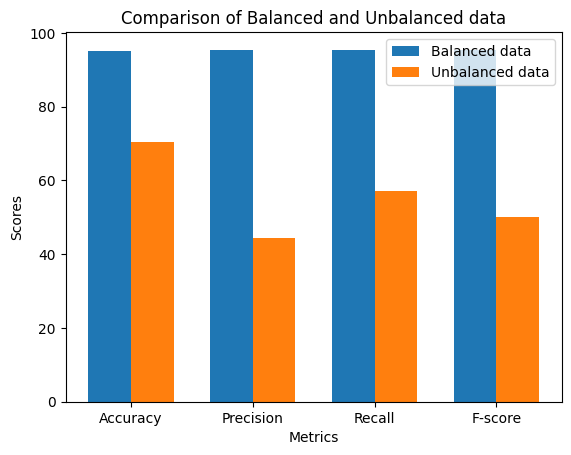

In [ ]:
import matplotlib.pyplot as plt

# Chỉ số của các thuật toán SVM và KNN
balanced_bilstm = [accuracy_bilstm, precision_bilstm, recall_bilstm, f1_bilstm]
unbalanced_bilstm = [accuracy_bilstm_u, precision_bilstm_u, recall_bilstm_u, f1_bilstm_u]


# Tên của các chỉ số
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F-score']

# Độ rộng của cột
bar_width = 0.35

# Vị trí của các chỉ số trên trục x
index = list(range(len(balanced_bilstm)))

# Vẽ biểu đồ
plt.bar(index, balanced_bilstm, bar_width, label='Balanced data')
plt.bar([i + bar_width for i in index], unbalanced_bilstm, bar_width, label='Unbalanced data')

# Gán nhãn cho trục x và trục y
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Balanced and Unbalanced data')
plt.xticks([i + bar_width/2 for i in index], metrics_labels)

# Thêm chú thích cho biểu đồ
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Bảng


In [ ]:
import pandas as pd

# Dữ liệu
data_table = {
    'Algorithm': ['SVM', 'KNN', 'LSTM', 'NNB', 'RNN', 'CNN', 'BiLSTM'],
    'Accuracy': [accuracy_test_best_svm, accuracy_test_best_knn, accuracy1_lstm, accuracy1_nb, accuracy_rnn, accuracy_cnn, accuracy_bilstm],
    'Precision': [precision_test_best_svm, precision_test_best_knn, precision_lstm, precision_nb, precision_rnn, precision_cnn, precision_bilstm],
    'Recall': [recall_test_best_svm, recall_test_best_knn, recall_lstm, recall_nb, recall_rnn, recall_cnn, recall_bilstm],
    'F1 Score': [f1_score_test_best_svm, f1_score_test_best_knn, f1_lstm, f1_nb, f_score_rnn, f_score_cnn, f1_bilstm]
}

# Tạo DataFrame
df_table = pd.DataFrame(data_table)

# Hiển thị bảng
df_table


,Algorithm,Accuracy,Precision,Recall,F1 Score
0,SVM,91.304348,100.000000,91.304348,95.454545
1,KNN,73.913043,100.000000,73.913043,85.000000
2,LSTM,91.489362,92.000000,92.000000,92.000000
3,NNB,85.106383,82.142857,92.000000,86.792453
4,RNN,91.304348,92.307692,92.307692,92.307692
5,CNN,91.304348,100.000000,84.615385,91.666667
6,BiLSTM,95.238095,95.454545,95.454545,95.454545
